In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="uhrpY7vYVAtQ6Of79idJ")
project = rf.workspace("mrkbil-projects").project("fabric-defect-dataset")
version = project.version(1)
dataset = version.download("multiclass")


train_path='/content/Fabric-Defect-Dataset-1/train'
valid_path='/content/Fabric-Defect-Dataset-1/valid'
test_path='/content/Fabric-Defect-Dataset-1/test'
classes='/_classes.csv'

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-Defect-Dataset-1 in multiclass:: 100%|██████████| 2476/2476 [00:02<00:00, 1155.54it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DIP

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1c69eUIfPfi6r3aS038Of4RbJLYg2M7W7/DIP


In [ ]:
train_df=pd.read_csv(train_path+classes)
test_df=pd.read_csv(test_path+classes)
valid_df=pd.read_csv(valid_path+classes)

In [ ]:
train_df.columns=['filename', 'Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']
test_df.columns=['filename', 'Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']
valid_df.columns=['filename', 'Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']
train_df.head(2)

,filename,Broken_button,Button_hike,Color_defect,Foreign_yarn,Hole,Swing_error
0,IMG-20240501-WA0033_jpg.rf.3d08e7e198362f2a247...,1,0,0,0,0,0
1,hole_png.rf.3b35998f2ead7b5b73772689853b82b9.jpg,0,0,0,0,1,0


In [ ]:
from tqdm import tqdm
import cv2
import os
target_size=(640, 640)

def load_images_and_labels(df, directory):
    dataset = []
    total_samples = len(df)
    i=0
    for index, row in tqdm(df.iterrows(), total=total_samples, desc="Loading Images"):
        # if(i==10):['Broken-Button', 'Button', 'Color', 'Hole', 'Swing', 'yarn']
        #   break
        i+=1
        filename = row['filename']
        filepath = os.path.join(directory, filename)

        img = cv2.imread(filepath)
        img = cv2.resize(img, target_size)

        label = row[['Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']].values.tolist()

        dataset.append((img, label))
    return dataset

def get_x_y_from_dataset(dataset):
    X = np.array([data_point[0] for data_point in dataset])
    y = np.array([data_point[1] for data_point in dataset])
    return X, y

In [ ]:
train_data=load_images_and_labels(train_df,train_path)
test_data=load_images_and_labels(test_df,test_path)
valid_data=load_images_and_labels(valid_df,valid_path)

Loading Images: 100%|██████████| 202/202 [00:02<00:00, 87.79it/s]


In [ ]:
X_train, y_train = get_x_y_from_dataset(train_data)
X_test, y_test = get_x_y_from_dataset(test_data)
X_valid, y_valid = get_x_y_from_dataset(valid_data)

train_data=None
test_data=None
valid_data=None

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (2163, 640, 640, 3)
Shape of y_train: (2163, 6)
Shape of X_test: (103, 640, 640, 3)
Shape of y_test: (103, 6)
Shape of X_valid: (202, 640, 640, 3)
Shape of y_valid: (202, 6)


In [ ]:
from sklearn.model_selection import train_test_split

merged_X = np.concatenate([X_train, X_test, X_valid], axis=0)
merged_y = np.concatenate([y_train, y_test, y_valid], axis=0)
print("Shape of merged_X:", merged_X.shape)
print("Shape of merged_y:", merged_y.shape)

Shape of merged_X: (2468, 640, 640, 3)
Shape of merged_y: (2468, 6)


In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test_val, y_train, y_test_val = train_test_split(augmented_images, augmented_labels, test_size=0.3, random_state=42)
X_train, X_test_val, y_train, y_test_val = train_test_split(merged_X, merged_y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
merged_X=None
merged_y=None
X_train=None
y_train=None
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_test shape: (370, 640, 640, 3)
y_test shape: (370, 6)
X_val shape: (371, 640, 640, 3)
y_val shape: (371, 6)


Sample images from testing set:


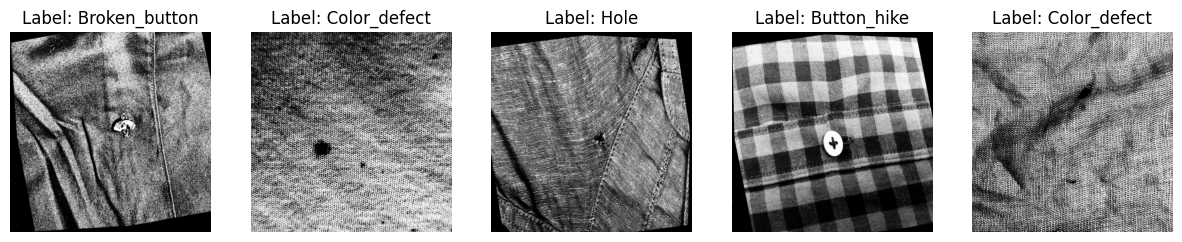

In [ ]:
def show_samples(images, labels, label_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        axes[i].imshow(images[i])
        label_index = labels[i].argmax()
        label_name = label_names[label_index]
        axes[i].set_title("Label: {}".format(label_name))
        axes[i].axis('off')

    plt.show()

label_names = ['Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']

# print("Sample images from training set:")
# show_samples(X_train, y_train, label_names)
print("Sample images from testing set:")
show_samples(X_test, y_test, label_names)
# print("Sample images from Validation set:")
# show_samples(X_val, y_val, label_names)

In [ ]:
VGG16 = tf.keras.models.load_model('BestModels/vgg16_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
ResNet50 = tf.keras.models.load_model('BestModels/resnet50_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
MobileNet = tf.keras.models.load_model('BestModels/MobileNet_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
InceptionV3 = tf.keras.models.load_model('BestModels/inception_v3_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
Xception = tf.keras.models.load_model('BestModels/xception_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')

In [ ]:
loss,accuracy = VGG16.evaluate(X_test,y_test)
print('VGG16')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = ResNet50.evaluate(X_test,y_test)
print('ResNet50')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = MobileNet.evaluate(X_test,y_test)
print('MobileNet')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = InceptionV3.evaluate(X_test,y_test)
print('InceptionV3')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = Xception.evaluate(X_test,y_test)
print('Xception')
print("loss:",loss)
print("Accuracy:",accuracy)

12/12 [==============================] - 70s 3s/step - loss: 1.3444 - accuracy: 0.7973
VGG16
loss: 1.3443892002105713
Accuracy: 0.7972972989082336
12/12 [==============================] - 25s 1s/step - loss: 1.0353 - accuracy: 0.8595
ResNet50
loss: 1.0352932214736938
Accuracy: 0.8594594597816467
12/12 [==============================] - 11s 463ms/step - loss: 10.6414 - accuracy: 0.7730
MobileNet
loss: 10.641448020935059
Accuracy: 0.7729730010032654
12/12 [==============================] - 33s 1s/step - loss: 1.9029 - accuracy: 0.5595
InceptionV3
loss: 1.902896523475647
Accuracy: 0.5594594478607178
12/12 [==============================] - 37s 2s/step - loss: 1.6498 - accuracy: 0.6541
Xception
loss: 1.649785041809082
Accuracy: 0.6540540456771851


In [ ]:
y_pred1 = VGG16.predict(X_test)
y_pred2 = ResNet50.predict(X_test)
y_pred3 = MobileNet.predict(X_test)
y_pred4 = InceptionV3.predict(X_test)
y_pred5 = Xception.predict(X_test)

12/12 [==============================] - 12s 951ms/step


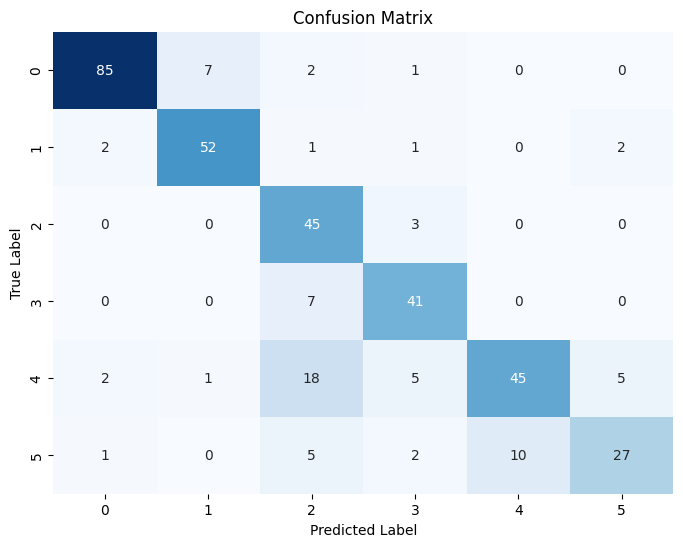

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred1, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

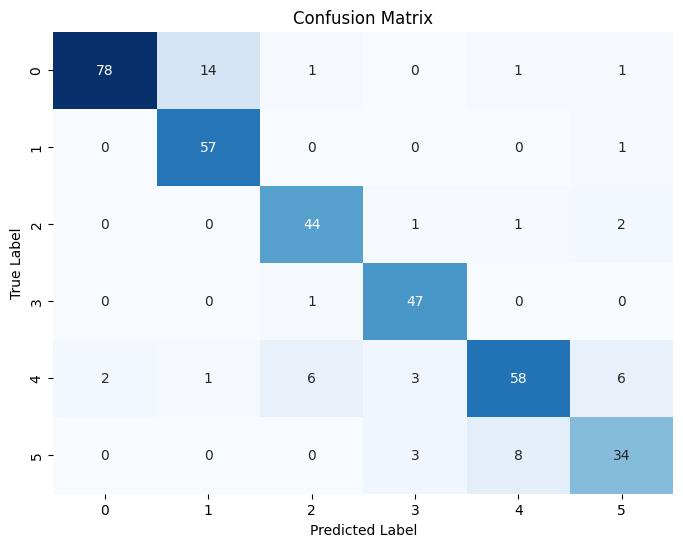

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred2, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

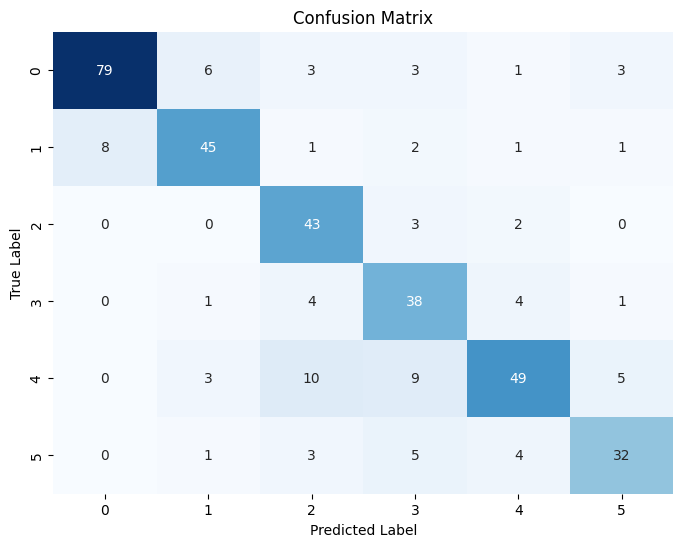

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred3, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

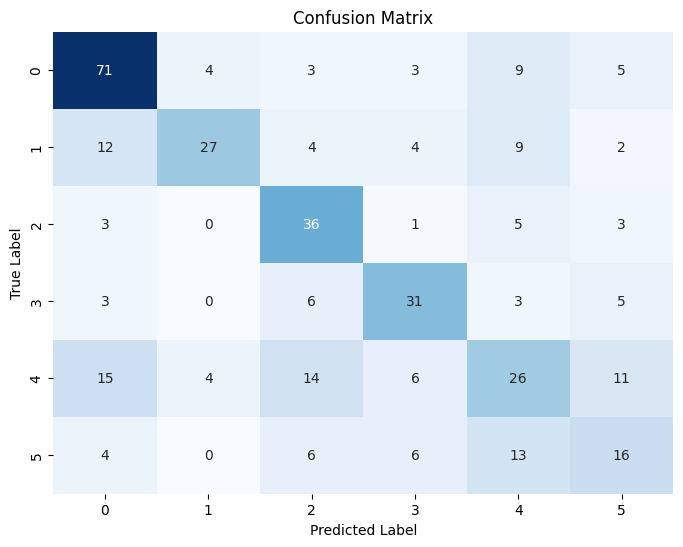

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred4, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

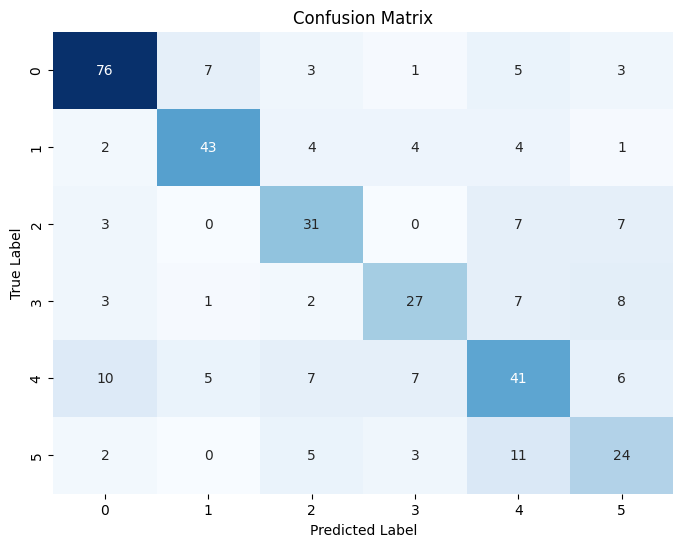

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred5, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def show_sample_images(images, labels, predicted_labels, label_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        axes[i].imshow(images[i])
        true_label = label_names[labels[i]]
        predicted_label = label_names[predicted_labels[i]]
        axes[i].set_title("True Label: {}\nPredicted Label: {}".format(true_label, predicted_label))
        axes[i].axis('off')

    plt.show()

label_names=['Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']

In [ ]:
from sklearn.metrics import classification_report

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred1, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

y_pred_labels = np.argmax(y_pred2, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
from sklearn.metrics import classification_report
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)



y_pred_labels = np.argmax(y_pred3, axis=1)


report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

y_pred_labels = np.argmax(y_pred4, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

y_pred_labels = np.argmax(y_pred5, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.metrics import accuracy_score

predictions_VGG16 = VGG16.predict(X_test)
predictions_ResNet50 = ResNet50.predict(X_test)
predictions_MobileNet = MobileNet.predict(X_test)
predictions_InceptionV3 = InceptionV3.predict(X_test)
predictions_Xception = Xception.predict(X_test)

# Convert probabilities to class labels
predicted_classes_VGG16 = np.argmax(predictions_VGG16, axis=-1)
predicted_classes_ResNet50 = np.argmax(predictions_ResNet50, axis=-1)
predicted_classes_MobileNet = np.argmax(predictions_MobileNet, axis=-1)
predicted_classes_InceptionV3 = np.argmax(predictions_InceptionV3, axis=-1)
predicted_classes_Xception = np.argmax(predictions_Xception, axis=-1)




12/12 [==============================] - 12s 951ms/step


In [ ]:
# Convert one-hot encoded y_test back to integer labels
true_classes = np.argmax(y_test, axis=-1)

# Compute individual accuracies
accuracy_VGG16 = accuracy_score(true_classes, predicted_classes_VGG16)
accuracy_ResNet50 = accuracy_score(true_classes, predicted_classes_ResNet50)
accuracy_MobileNet = accuracy_score(true_classes, predicted_classes_MobileNet)
accuracy_InceptionV3 = accuracy_score(true_classes, predicted_classes_InceptionV3)
accuracy_Xception = accuracy_score(true_classes, predicted_classes_Xception)

# Ensemble predictions using majority voting
ensemble_predictions = predictions_VGG16 + predictions_ResNet50 +predictions_MobileNet+ predictions_InceptionV3 + predictions_Xception
final_predictions = np.argmax(ensemble_predictions, axis=-1)

# Compute ensemble accuracy
ensemble_accuracy = accuracy_score(true_classes, final_predictions)

In [ ]:
print("Individual Accuracies:")
print("VGG16 Accuracy:", accuracy_VGG16)
print("ResNet50 Accuracy:", accuracy_ResNet50)
print("ResNet50 Accuracy:", accuracy_MobileNet)
print("InceptionV3 Accuracy:", accuracy_InceptionV3)
print("Xception Accuracy:", accuracy_Xception)

print("Ensemble Accuracy (Majority Voting):", ensemble_accuracy)

Individual Accuracies:
VGG16 Accuracy: 0.7972972972972973
ResNet50 Accuracy: 0.8594594594594595
ResNet50 Accuracy: 0.772972972972973
InceptionV3 Accuracy: 0.5594594594594594
Xception Accuracy: 0.654054054054054
Ensemble Accuracy (Majority Voting): 0.8918918918918919


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Define the accuracies of each model on the validation set
accuracies = {
    "VGG16": accuracy_VGG16,
    "ResNet50": accuracy_ResNet50,
    "MobileNet": accuracy_MobileNet,
    "InceptionV3": accuracy_InceptionV3,
    "Xception": accuracy_Xception
}

# Normalize accuracies to sum up to 1
total_accuracy = sum(accuracies.values())
weights = {model: accuracy / total_accuracy for model, accuracy in accuracies.items()}

# Initialize ensemble predictions
ensemble_predictions = np.zeros_like(predictions_VGG16)

# Combine predictions using weighted voting
for model, weight in weights.items():
    # Calculate the weighted prediction for each model
    weighted_predictions = weight * locals()[f"predictions_{model}"]
    # Accumulate the weighted predictions
    ensemble_predictions += weighted_predictions

# Convert ensemble predictions to class labels
final_predictions = np.argmax(ensemble_predictions, axis=-1)

# Compute ensemble accuracy
ensemble_accuracy = accuracy_score(true_classes, final_predictions)


In [ ]:
print(ensemble_accuracy)

0.9


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, final_predictions)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[88  4  2  1  0  0]
 [ 1 55  0  0  1  1]
 [ 0  0 46  0  2  0]
 [ 0  0  1 46  1  0]
 [ 0  1  8  5 60  2]
 [ 0  0  2  2  3 38]]


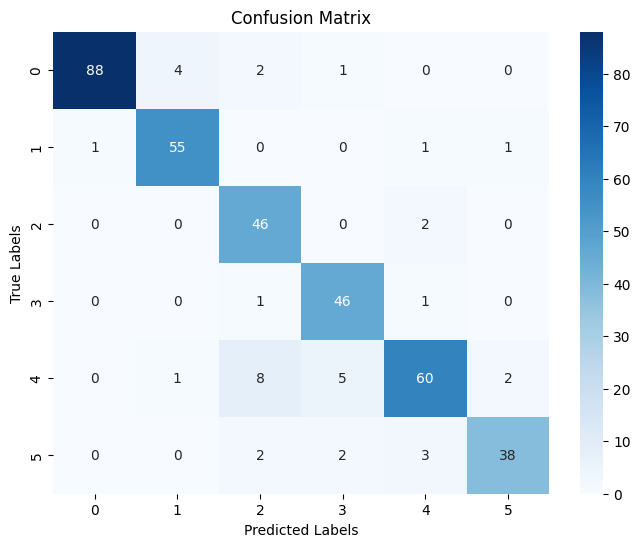

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, final_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate classification report
class_report = classification_report(true_classes, final_predictions)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        95
           1       0.92      0.95      0.93        58
           2       0.78      0.96      0.86        48
           3       0.85      0.96      0.90        48
           4       0.90      0.79      0.84        76
           5       0.93      0.84      0.88        45

    accuracy                           0.90       370
   macro avg       0.89      0.90      0.90       370
weighted avg       0.91      0.90      0.90       370

